In [71]:
from dataset import CustomDatasetLoader

In [2]:
dataset_dir = './dataset/'  # Change to your dataset path
loader = CustomDatasetLoader(dataset_dir, image_size=(72, 72))

images_aug, labels_aug = loader.load_dataset(with_augmentation=True)

Found 1081 real images and 960 fake images
Loading real images...


100%|██████████| 1081/1081 [00:24<00:00, 43.76it/s]


Loading fake images...


100%|██████████| 960/960 [00:21<00:00, 43.90it/s]


In [4]:
images_aug.shape

(12246, 72, 72, 3)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [53]:
augmented_images = []
image = images_aug[10]
image = Image.open('dataset/real/real_00091.jpg')
image = np.array(image)
image = image.astype(np.float32) / 255.0
        
augmented_images.append(image)
        # Horizontal flip
flipped = np.fliplr(image)
augmented_images.append(flipped)

# Brightness adjustment
brightness = np.clip(image * np.random.uniform(0.4, 1.4), 0, 1)
augmented_images.append(brightness)

# # Contrast adjustment
# mean = np.mean(image, axis=(0, 1), keepdims=True)
# contrast = np.clip((image - mean) * np.random.uniform(0.8, 1.2) + mean, 0, 1)
mean = np.mean(image, axis=(0, 1), keepdims=True)
contrast = np.clip((image - mean) * np.random.uniform(0.6, 1.4) + mean, 0, 1)
augmented_images.append(contrast)

# rotated_90 = np.rot90(image, k=1)  # k=1 for 90-degree rotation
# augmented_images.append(rotated_90)

# flipped_ud = np.flipud(image)
# augmented_images.append(flipped_ud)


# # Rotation by 90 degrees counterclockwise
# rotated_270 = np.rot90(image, k=3)  # k=3 for 270-degree (counterclockwise) rotation
# augmented_images.append(rotated_270)
# augmented_images.append(contrast)

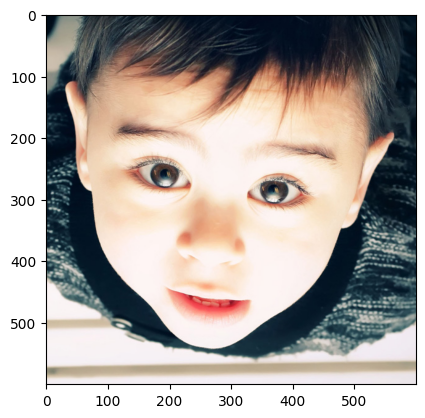

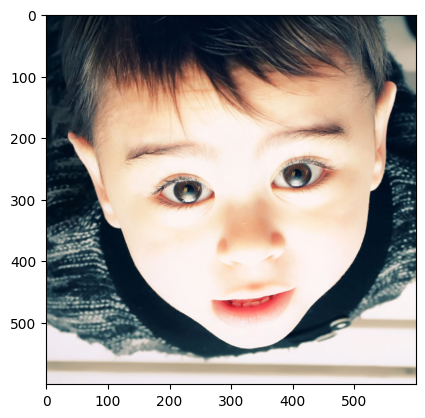

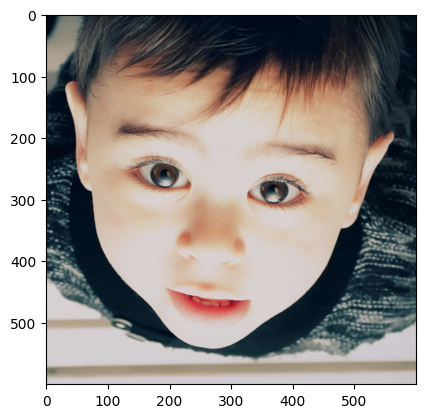

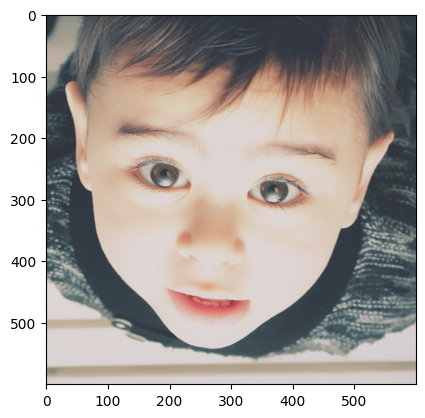

In [54]:
for i in augmented_images:
    plt.imshow(i)
    plt.show()

[[171 319]
 [186 303]
 [209 300]
 [233 312]
 [211 321]
 [188 326]] [[320 295]
 [338 275]
 [362 271]
 [385 280]
 [367 293]
 [343 296]] [[271 287]
 [274 313]
 [277 338]
 [279 364]
 [262 399]
 [274 400]
 [287 401]
 [300 395]
 [314 389]] [[242 470]
 [260 450]
 [276 436]
 [291 438]
 [304 433]
 [327 439]
 [357 451]
 [333 466]
 [313 473]
 [298 476]
 [283 477]
 [265 477]
 [253 467]
 [279 455]
 [294 454]
 [308 451]
 [346 452]
 [308 452]
 [294 455]
 [279 457]]
(6, 2) (6, 2) (9, 2) (20, 2)


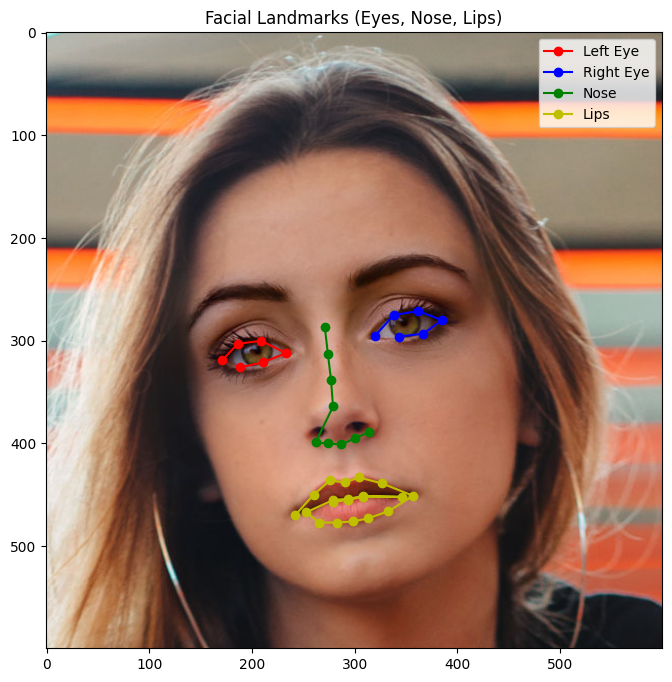

In [2]:
import cv2
import dlib

# Load the image
image_path = "dataset/fake/hard_136_1101.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Initialize dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")  # Path to the model

# Detect faces in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

# Check if any faces are detected
if len(faces) > 0:
    for face in faces:
        # Get the landmarks
        landmarks = predictor(gray, face)

        # Extract the coordinates for eyes, nose, and lips
        # Eyes (indexes 36 to 41 for the left eye, 42 to 47 for the right eye)
        left_eye = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)]
        right_eye = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(42, 48)]

        # Nose (indexes 27 to 35 for the nose region)
        nose = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]

        # Lips (indexes 48 to 67 for the lip region)
        lips = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(48, 68)]

        # Convert lists of coordinates to numpy arrays for easier plotting
        left_eye = np.array(left_eye)
        right_eye = np.array(right_eye)
        nose = np.array(nose)
        lips = np.array(lips)
        print(left_eye, right_eye, nose, lips)
        print(left_eye.shape, right_eye.shape, nose.shape, lips.shape)
        
        
        # Plotting the facial regions
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)

        # Plot eyes, nose, and lips
        plt.plot(left_eye[:, 0], left_eye[:, 1], 'ro-', label="Left Eye")
        plt.plot(right_eye[:, 0], right_eye[:, 1], 'bo-', label="Right Eye")
        plt.plot(nose[:, 0], nose[:, 1], 'go-', label="Nose")
        plt.plot(lips[:, 0], lips[:, 1], 'yo-', label="Lips")

        # Add labels and title
        plt.title("Facial Landmarks (Eyes, Nose, Lips)")
        plt.legend()
        plt.show()
else:
    print("No faces detected in the image.")


In [3]:
import dlib
import os
from imutils import face_utils

In [ ]:
def extract_facial_features(image, face_detector, shape_predictor):
    """Extract eyes, nose, and lips regions from the image."""
    # Convert to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    # gray = gray.astype(np.uint8)
    gray = np.clip(gray * 255, 0, 255).astype(np.uint8)

    # Detect face
    faces = face_detector(gray, 1)
    # print(f"Faces detected: {len(faces)}")
    if len(faces) == 0:
        return None

    # Get facial landmarks
    shape = shape_predictor(gray, faces[0])
    shape = face_utils.shape_to_np(shape)

    # Define facial features indices
    (left_eye_start, left_eye_end) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (right_eye_start, right_eye_end) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
    (nose_start, nose_end) = face_utils.FACIAL_LANDMARKS_IDXS["nose"]
    (mouth_start, mouth_end) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]

    # Extract regions
    left_eye = shape[left_eye_start:left_eye_end]
    right_eye = shape[right_eye_start:right_eye_end]
    nose = shape[nose_start:nose_end]
    mouth = shape[mouth_start:mouth_end]

    # Get bounding rectangles
    features = []
    for region in [left_eye, right_eye, nose, mouth]:
        x_min = np.min(region[:, 0])
        x_max = np.max(region[:, 0])
        y_min = np.min(region[:, 1])
        y_max = np.max(region[:, 1])

        # Add padding
        padding = 10
        x_min = max(0, x_min - padding)
        x_max = min(image.shape[1], x_max + padding)
        y_min = max(0, y_min - padding)
        y_max = min(image.shape[0], y_max + padding)

        # Extract and resize region
        region_img = image[y_min:y_max, x_min:x_max]
        region_img = cv2.resize(region_img, (70, 70))  # Standardize size
        # print(region_img)
        
        features.append(region_img)

    return np.concatenate(features)

    # Initialize face detection and landmark prediction
face_detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor('utils/shape_predictor_68_face_landmarks.dat')

# Extract features from all images
features = []
valid_labels = []

# for img, label in zip(images_aug, labels_aug):?
image_path = "dataset/fake/easy_224_1100.jpg"  # Replace with your image path
img = np.array(Image.open(image_path))
label = 1

feature_vector = extract_facial_features(img, face_detector, shape_predictor)

if feature_vector is not None:
    features.append(feature_vector)
    valid_labels.append(label)


features = np.array(features)
valid_labels = np.array(valid_labels)


In [14]:
features.shape

(0,)

In [13]:
for i in features:
    plt.imshow(i)
    plt.show()